<h1 style="color:#572230;font-size:30px;text-align:center;"><strong>Table of Content</strong></h1>

## 1. [Imports and environment setup](#1)

## 2. [Load Data sets](#2)

## 3. [Summary of the exploratory data analysis (EDA)](#3)

## 4. [Data Before Preprocessing](#4)
    
## 5. [Data Preprocessing](#5)

5.1 [Column Dropping](#5.1) 

5.2 [Remove Duplicates](#5.2)

5.3 [Mean Inputation for invalid values](#5.3)

5.4 [Handle Outliers](#5.4)

5.5 [Feature Scaling](#5.5)

5.6 [Handle Imbalanced Classes](#5.6)

## 6. [Save the Preprocessed Data](#6)

## 7. [Data After Preprocessing](#7)

<br>
<hr>


# 1. Imports and environment setup

In [20]:
import pandas as pd
from scipy.stats.mstats import winsorize
import seaborn as sns
import warnings
from pandas.core.generic import SettingWithCopyWarning
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE

# 2. Load Data sets

In [21]:
trainDataFrame= pd.read_csv('../data/data_train.csv', delimiter=',')
testDataFrame= pd.read_csv('../data/data_test.csv', delimiter=',')

# 3. Summary of the exploratory data analysis (EDA)

Based on the exploratory data analysis (EDA) conducted, the following observations have been made:

- No missing values were identified in either the train or test datasets.
- Upon scrutiny of the 'Id' column in both datasets, duplicated rows were found.
- The 'ExtraMedTest' and 'ExtraAlcoholTest' columns displayed invalid range values outside the [-100, 100] range in both datasets. Consequently, it has been decided to address this issue using the Winsorizing method.
- Recognizing that the 'Id' column lacks relevance for predicting the onset of diabetes in individuals, it has been determined to be superfluous and thus slated for removal.

In summary, our plan entails winsorizing the 'ExtraMedTest' and 'ExtraAlcoholTest' columns and subsequently dropping the 'Id' column.column and duplicates.

# 4. Data Before Preprocessing

## 4.1. Invalid Range Values

In [22]:
print("TRAIN DATA SET")
print(f"Maximum value in 'ExtraMedTest' column: {trainDataFrame['ExtraMedTest'].max():.2f}")
print(f"Minimum value in 'ExtraMedTest' column: {trainDataFrame['ExtraMedTest'].min():.2f}")
print(f"Maximum value in 'ExtraAlcoholTest' column: {trainDataFrame['ExtraAlcoholTest'].max():.2f}")
print(f"Minimum value in 'ExtraAlcoholTest' column: {trainDataFrame['ExtraAlcoholTest'].min():.2f}")

print("\nTEST DATA SET")
print(f"Maximum value in 'ExtraMedTest' column: {testDataFrame['ExtraMedTest'].max():.2f}")
print(f"Minimum value in 'ExtraMedTest' column: {testDataFrame['ExtraMedTest'].min():.2f}")
print(f"Maximum value in 'ExtraAlcoholTest' column: {testDataFrame['ExtraAlcoholTest'].max():.2f}")
print(f"Minimum value in 'ExtraAlcoholTest' column: {testDataFrame['ExtraAlcoholTest'].min():.2f}")


TRAIN DATA SET
Maximum value in 'ExtraMedTest' column: 199.00
Minimum value in 'ExtraMedTest' column: -199.00
Maximum value in 'ExtraAlcoholTest' column: 199.00
Minimum value in 'ExtraAlcoholTest' column: -199.00

TEST DATA SET
Maximum value in 'ExtraMedTest' column: 199.00
Minimum value in 'ExtraMedTest' column: -199.00
Maximum value in 'ExtraAlcoholTest' column: 199.00
Minimum value in 'ExtraAlcoholTest' column: -199.00


## 4.2. Id Column's Existence

### 4.2.1. Train Data Set

In [23]:
trainDataFrame

,Id,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest,Status
0,0,0,0,1,24,1,0,0,1,0,...,0,0,0,0,8,4,5,60,0,0
1,1,0,0,1,28,0,0,0,1,1,...,1,0,0,0,2,6,8,0,-64,0
2,2,0,0,1,36,1,0,0,1,1,...,30,30,1,0,3,2,1,-46,0,0
3,3,0,1,1,35,0,0,0,1,1,...,0,0,0,0,8,6,8,-83,-188,0
4,4,0,1,1,27,0,0,0,1,0,...,0,0,0,0,9,5,4,-58,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202939,202939,0,0,1,29,0,0,0,1,0,...,10,2,0,0,8,6,7,-66,4,0
202940,202940,0,0,1,23,0,0,0,1,0,...,0,0,0,0,11,5,7,0,-84,0
202941,202941,1,1,1,38,0,0,0,1,1,...,0,2,0,1,10,6,6,-57,-16,0
202942,202942,0,1,1,22,0,0,0,1,1,...,0,14,0,0,9,6,7,59,0,0


### 4.2.2. Test Data Set

In [24]:
testDataFrame

,Id,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest,Status
0,202944,1,1,1,30,1,0,1,1,1,...,3,0,0,1,11,4,7,0,-145,NaN
1,202945,0,0,1,27,1,0,0,0,0,...,0,30,1,1,13,2,5,28,-145,NaN
2,202946,0,0,1,21,0,0,0,1,1,...,0,5,0,0,10,6,8,-26,72,NaN
3,202947,0,0,1,24,1,0,0,1,1,...,0,30,0,0,9,6,7,0,0,NaN
4,202948,1,0,1,34,0,0,0,1,1,...,0,1,1,0,11,4,7,-73,-63,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50731,253675,1,0,1,38,0,0,0,1,1,...,2,2,0,0,8,6,7,43,22,NaN
50732,253676,0,1,1,24,0,0,0,1,0,...,25,0,0,0,10,6,7,-6,-67,NaN
50733,253677,1,1,1,31,0,0,1,1,1,...,0,0,1,0,13,5,3,34,100,NaN
50734,253678,1,1,1,24,1,0,0,0,0,...,0,0,1,1,11,5,7,189,100,NaN


# 5. Data Preprocessing

## 5.1. Column Dropping

In [25]:
trainDataFrame = trainDataFrame.drop(columns='Id')
testDataFrame = testDataFrame.drop(columns='Id')

## 5.2. Remove Duplicates

In [26]:
trainDataFrame.drop_duplicates(inplace=True)
trainDataFrame.drop_duplicates(inplace=True)

## 5.3. Mean Inputation for invalid values 

We will proceed with mean inputation instead of winsorizing to handle invalid values due to the reasons we have discussed in the EDA step.

In [27]:
def impute_missing_with_mean_within_bounds(data, column_name, lower_bound, upper_bound):
    # Calculate the mean of values within the bounds
    valid_values = data[(data[column_name] >= lower_bound) & (data[column_name] <= upper_bound)][column_name]
    mean_value = valid_values.mean()
    
    # Ensure mean value has the same dtype as the column
    mean_value = data[column_name].dtype.type(mean_value)
    
    # Replace missing values only if they are outside the bounds
    data.loc[(data[column_name] < lower_bound) | (data[column_name] > upper_bound), column_name] = mean_value

# Define the lower and upper bounds for winsorizing
lower_bound = -100
upper_bound = 100

# Apply mean imputation within bounds to ExtraMedTest column
impute_missing_with_mean_within_bounds(trainDataFrame, 'ExtraMedTest', lower_bound, upper_bound)
impute_missing_with_mean_within_bounds(testDataFrame, 'ExtraMedTest', lower_bound, upper_bound)

# Apply mean imputation within bounds to ExtraAlcoholTest column
impute_missing_with_mean_within_bounds(trainDataFrame, 'ExtraAlcoholTest', lower_bound, upper_bound)
impute_missing_with_mean_within_bounds(testDataFrame, 'ExtraAlcoholTest', lower_bound, upper_bound)


## 5.4. Handle Outliers 

### 5.4.1. Pre-Handled

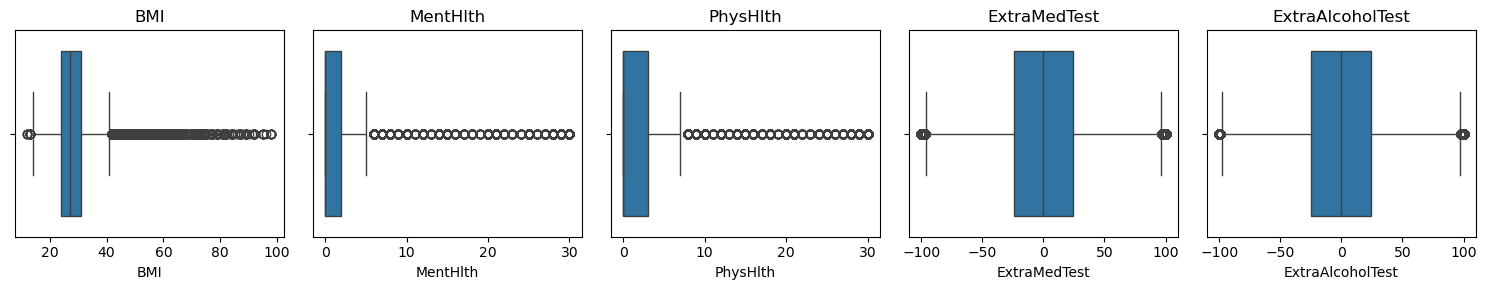

In [28]:
# Create subplots
num_cols = 5
num_rows = (5 + num_cols - 1) // num_cols

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 3 * num_rows))

# Flatten the axes array
axes = axes.flatten()

# Plot each column
numeric_features = ['BMI', 'MentHlth', 'PhysHlth', 'ExtraMedTest', 'ExtraAlcoholTest']
for i, col in enumerate(numeric_features):
    if i < len(numeric_features):
        ax = axes[i]
        sns.boxplot(data=trainDataFrame[col], orient='h', ax=ax)
        ax.set_title(col)
    else:
        axes[i].axis('off')

plt.tight_layout()
plt.show()

### 5.4.2. Perform IQR and Capping

In [29]:
# Filter out specific NumPy warnings related to masked arrays and partition
warnings.filterwarnings("ignore", message="Warning: 'partition' will ignore the 'mask' of the MaskedArray.")

def perform_iqr_capping(df: pd.DataFrame, numeric_features: list, whisker: float = 1.5) -> None:
    # Calculate IQR for all numeric features
    q1 = df[numeric_features].quantile(0.25)
    q3 = df[numeric_features].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - whisker * iqr
    upper_bound = q3 + whisker * iqr

    # Cap outliers
    df[numeric_features] = np.where(df[numeric_features] < lower_bound, lower_bound, df[numeric_features])
    df[numeric_features] = np.where(df[numeric_features] > upper_bound, upper_bound, df[numeric_features])

numeric_features = ['BMI', 'MentHlth', 'PhysHlth', 'ExtraMedTest', 'ExtraAlcoholTest']

perform_iqr_capping(trainDataFrame, numeric_features)
perform_iqr_capping(testDataFrame, numeric_features)

### 5.4.3. Post-Handled

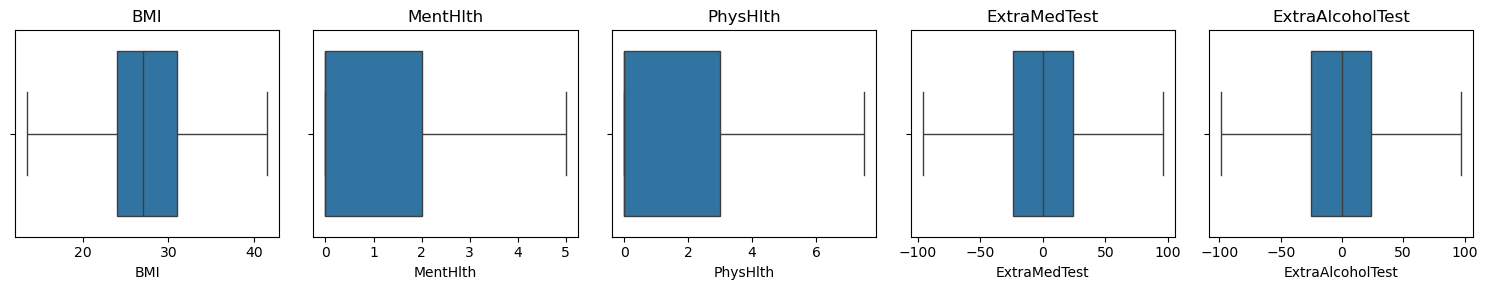

In [30]:
# Create subplots
num_cols = 5
num_rows = (5 + num_cols - 1) // num_cols

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 3 * num_rows))

# Flatten the axes array
axes = axes.flatten()

# Plot each column
for i, col in enumerate(numeric_features):
    if i < len(numeric_features):
        ax = axes[i]
        sns.boxplot(data=trainDataFrame[col], orient='h', ax=ax)
        ax.set_title(col)
    else:
        axes[i].axis('off')

plt.tight_layout()
plt.show()

## 5.5. Feature Scaling

Feature scaling benefits by improving model performance, enhancing convergence, and ensuring numerical stability. However, caution should be exercised when applying it, especially regarding its potential to alter data distribution and sensitivity to outliers.

### 5.5.1. Normalization VS Standardization

In this step, we're going to scale the features of our dataset to ensure they are on a similar range or distribution. We have both categorical and numerical data in our dataset, so we'll handle them differently.

#### Categorical Data
Our categorical variables have already been encoded as numeric values, with binary categorical data represented by 0s and 1s, and non-binary categorical data having other numeric values. Examples of non-binary categorical features include 'GenHlth', 'Age', 'Education', and 'Income'.

#### Numeric Data
Numeric data in columns such as 'BMI', 'MentHlth', 'PhysHlth', 'ExtraMedTest', and 'ExtraAlcoholTest' may require scaling depending on the algorithm used and the feature scale.

#### Choosing between Normalization and Standardization
We need to review the range of our features:
- 'BMI': 0 to 100
- 'MentHlth', 'PhysHlth': 1 to 30
- 'ExtraMedTest', 'ExtraAlcoholTest': -100 to 100


**Normalization:**

Normalization rescales features to a range between 0 and 1.

- Pros:
1. Maintains the original distribution and relationships between data points.
2. Useful for algorithms that require features to be on a similar scale, such as KNN or neural networks.
3. Helps improve the convergence speed of gradient descent algorithms.
  
- Cons:
1. Sensitive to outliers and can be affected by extreme values.
2. May not be suitable for algorithms that assume a Gaussian distribution or require features with a mean of zero and unit variance.

**Standardization:**

Standardization transforms features to have a mean of 0 and a standard deviation of 1.

- Pros:
1. Centers the data around zero and gives it a unit variance, making it suitable for algorithms sensitive to feature scales like SVMs and logistic regression.
2. Helps improve model interpretability by making coefficients comparable.
3. Less sensitive to outliers compared to normalization.
  
- Cons:
1. Alters the original distribution of the data, potentially affecting algorithms that assume specific data distributions.
2. May not be suitable for algorithms that require features to be on a similar scale without centering around zero.

Normalization scales numerical features to a range between 0 and 1, aligning them with binary features. This promotes equitable contributions from each feature during modeling. Therefore, we selectively apply normalization to numeric features to enhance overall model performance.

### 5.5.2. Normalization for the Numeric Features

In [31]:
scaler = MinMaxScaler()

scaler.fit(trainDataFrame[numeric_features])

trainDataFrame[numeric_features] = scaler.transform(trainDataFrame[numeric_features])
testDataFrame[numeric_features] = scaler.transform(testDataFrame[numeric_features])

### 5.5.3. Result of Normalization

In [32]:
trainDataFrame.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest,Status
count,202736.000000,202736.000000,202736.000000,202736.000000,202736.000000,202736.000000,202736.000000,202736.000000,202736.000000,202736.000000,...,202736.000000,202736.000000,202736.000000,202736.000000,202736.000000,202736.000000,202736.000000,202736.000000,202736.000000,202736.000000
mean,0.429060,0.424631,0.962621,0.521711,0.442970,0.040886,0.094487,0.756062,0.635077,0.811341,...,0.236108,0.247426,0.168880,0.439577,8.038513,5.049384,6.053799,0.507520,0.509607,0.175751
std,0.494943,0.494288,0.189688,0.198691,0.496738,0.198026,0.292506,0.429457,0.481410,0.391239,...,0.391387,0.385436,0.374647,0.496337,3.052012,0.985668,2.070335,0.254782,0.250683,0.380609
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.375000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000,0.375000,0.375000,0.000000
50%,0.000000,0.000000,1.000000,0.482143,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000,0.500000,0.502551,0.000000
75%,1.000000,1.000000,1.000000,0.625000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.400000,0.400000,0.000000,1.000000,10.000000,6.000000,8.000000,0.625000,0.625000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,13.000000,6.000000,8.000000,1.000000,1.000000,1.000000


In [33]:
testDataFrame.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest,Status
count,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,...,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,0.0
mean,0.430207,0.423230,0.962729,0.522126,0.445305,0.039479,0.093366,0.757509,0.629789,0.811022,...,0.231776,0.245241,0.166292,0.443531,8.010801,5.051187,6.046811,0.497636,0.497212,NaN
std,0.495110,0.494076,0.189428,0.198598,0.497004,0.194733,0.290947,0.428594,0.482866,0.391495,...,0.388741,0.383526,0.372346,0.496806,3.064743,0.986477,2.075180,0.247704,0.240270,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.005208,0.020408,NaN
25%,0.000000,0.000000,1.000000,0.375000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000,0.364583,0.364796,NaN
50%,0.000000,0.000000,1.000000,0.482143,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000,0.500000,0.502551,NaN
75%,1.000000,1.000000,1.000000,0.625000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.400000,0.400000,0.000000,1.000000,10.000000,6.000000,8.000000,0.604167,0.594388,NaN
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,13.000000,6.000000,8.000000,0.963542,0.938776,NaN


## 5.6. Handle Imbalanced Classes

### 5.6.1. Oversampling VS Undersampling

In our dataset, we have encountered class imbalance, where one class is significantly more prevalent than the other in the target feature 'Status'. To address this issue, we have several options available, each with its own advantages and disadvantages. Let's compare these options to determine which one would be suitable for our case:

1. **Oversampling:**
   Increases the number of instances in the minority class to balance the class distribution.
   - **Pros:** Simple to implement, no information loss, can effectively balance class distribution.
   - **Cons:** May lead to overfitting if not carefully implemented, duplicates existing data or introduces synthetic data.

2. **Undersampling:**
   Reduces the number of instances in the majority class to balance the class distribution.
   - **Pros:** Can be computationally efficient, straightforward to implement.
   - **Cons:** May discard potentially valuable information from the majority class, leading to loss of information.

Since we have defined an 82.4% to 17.6% split as indicative of class imbalance in 'Status', we should examine the characteristics of features considered imbalanced in our datasets.

**After trying both SMOTE and Random oversampling, as well as undersampling techniques,**
I found that oversampling techniques yielded better results for our dataset based on the performance of the baseline model after each technique. Specifically, I observed that oversampling, particularly SMOTE ticularly SMOTE (Synthetic Minority Over-sam, significantly improved the performance of our baseline model.

**Reasons for Choosing SMOTE over Random Oversampling:**
   - **SMOTE**: SMOTE generates synthetic samples by interpolating between existing minority class samples, which helps in capturing the underlying distribution more effectively. This approach reduces the risk of overfitting compared to simple random oversampling, where instances are duplicated without considering the data distribution.

By choosing SMOTE as our approach to handle class imbalance, we aim to improve the generalization and robustness of our model in predicting the 'Status' of patients.

### 5.6.2. Oversampling with SMOTE

In [34]:
from imblearn.over_sampling import SMOTE

# Assuming trainDataFrame and testDataFrame contain your respective datasets

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
train_features_resampled, train_labels_resampled = smote.fit_resample(trainDataFrame.drop('Status', axis=1), trainDataFrame['Status'])

train_features_resampled_df = pd.DataFrame(train_features_resampled, columns=trainDataFrame.drop('Status', axis=1).columns)
train_labels_resampled_df = pd.DataFrame(train_labels_resampled, columns=['Status'])


#### Previous 'Status' VS Oversampled 'Status' in the train data set

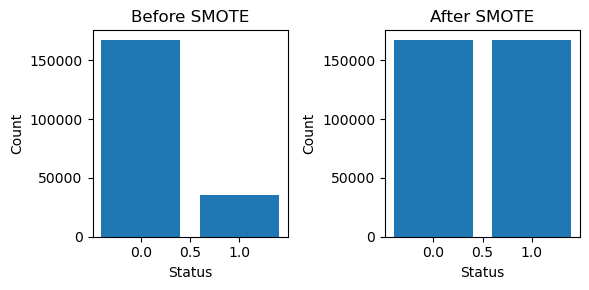

In [35]:
# Calculate value counts of 'Status' before SMOTE
status_counts_before = trainDataFrame['Status'].value_counts()

# Calculate value counts of 'Status' after SMOTE
status_counts_after = train_labels_resampled_df['Status'].value_counts()

# Create subplots for before and after SMOTE
fig, axs = plt.subplots(1, 2, figsize=(6, 3))

# Plot bar chart for 'Status' before SMOTE
axs[0].bar(status_counts_before.index, status_counts_before.values)
axs[0].set_title('Before SMOTE')
axs[0].set_xlabel('Status')
axs[0].set_ylabel('Count')

# Plot bar chart for 'Status' after SMOTE
axs[1].bar(status_counts_after.index, status_counts_after.values)
axs[1].set_title('After SMOTE')
axs[1].set_xlabel('Status')
axs[1].set_ylabel('Count')

# Show the plots
plt.tight_layout()
plt.show()

### 5.6.3. Reassign the Train data sets with the Oversampled version

In [36]:
trainDataFrame = pd.concat([train_features_resampled_df, train_labels_resampled_df], axis=1)

# 6. Save the Preprocessed Data

In [37]:
trainDataFrame.to_csv("../data/preprocessed_train.csv", index=False)
testDataFrame.to_csv("../data/preprocessed_test.csv", index=False)

# 7. Data After Preprocessing

## 7.1. Load the Preprocessed Data Sets

In [38]:
preprocessedTrainDf= pd.read_csv('preprocessed_train.csv', delimiter=',')
preprocessedTestDf= pd.read_csv('preprocessed_test.csv', delimiter=',')

FileNotFoundError: [Errno 2] No such file or directory: 'preprocessed_train.csv'

In [ ]:
preprocessedTrainDf.shape

In [ ]:
preprocessedTestDf.shape

## 7.2. Invalid Range Values

In [ ]:
print("TRAIN DATA SET")
print(f"Maximum value in 'ExtraMedTest' column: {preprocessedTrainDf['ExtraMedTest'].max():.2f}")
print(f"Minimum value in 'ExtraMedTest' column: {preprocessedTrainDf['ExtraMedTest'].min():.2f}")
print(f"Maximum value in 'ExtraAlcoholTest' column: {preprocessedTrainDf['ExtraAlcoholTest'].max():.2f}")
print(f"Minimum value in 'ExtraAlcoholTest' column: {preprocessedTrainDf['ExtraAlcoholTest'].min():.2f}")

print("\nTEST DATA SET")
print(f"Maximum value in 'ExtraMedTest' column: {preprocessedTestDf['ExtraMedTest'].max():.2f}")
print(f"Minimum value in 'ExtraMedTest' column: {preprocessedTestDf['ExtraMedTest'].min():.2f}")
print(f"Maximum value in 'ExtraAlcoholTest' column: {preprocessedTestDf['ExtraAlcoholTest'].max():.2f}")
print(f"Minimum value in 'ExtraAlcoholTest' column: {preprocessedTestDf['ExtraAlcoholTest'].min():.2f}")

## 7.3. Id Column's Existence

### 7.3.1. Train Data Set

In [ ]:
preprocessedTrainDf

### 7.3.2. Test Data Set

In [ ]:
preprocessedTestDf

**Following the completion of the data cleaning step, we are ready to move onto the model development.**